### 1. RECAMÁN

Kreirana je funkcija Recaman koja crta spiralni graf, odnosno stvara prikaz Recamánovog niza u 2 dimenzije. Funkcija uzima samo jedan parametar N koji odgovara zadnjem članu niza ($a_N$) do kojeg treba iscrtavati graf. Ideja zadatka preuzeta je iz videa YouTube kanala Numberphile (https://www.youtube.com/watch?v=FGC5TdIiT9U).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def Recaman(N):
    fig = plt.figure(1)
    ax = plt.axes()
    ax.set_aspect("equal")
    plt.axis('off')

    yi = 0
    zauzeti = [0] * int( N*(N+1)/2+1 )

    for r in range(1, N+1):
        zauzeti[yi] = 1
        if yi-r < 0 or zauzeti[yi-r] != 0:
            y = np.arange(yi, yi+r, 0.001)
            if r%2 == 0: x = np.sqrt( (r/2)**2 - (y-yi-r/2)**2 )
            else: x = -np.sqrt( (r/2)**2 - (y-yi-r/2)**2 )
            yi += r
        else:
            y = np.arange(yi-r, yi, 0.001)
            if r%2 == 0: x = np.sqrt( (r/2)**2 - (y-yi+r/2)**2 )
            else: x = -np.sqrt( (r/2)**2 - (y-yi+r/2)**2 )
            yi -= r
        plt.plot(x, y, color = 'Black', linewidth = 0.4)

    #plt.savefig('Recaman.pdf', bbox_inches='tight', pad_inches=0)
    plt.show()

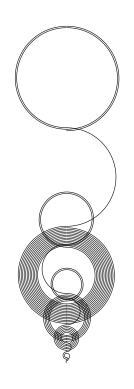

In [3]:
N = 70
Recaman(N)

### 2. SNIJEG

Kreirana je funkcija koja uzima parametar N (broj piksela sa svake strane ekrana), te generira televizijski šum, odnosno 'snijeg'. Svaki piksel u colormap grafu obojan je slučajno generiranom sivom nijansom, a vrijednosti su uniformno raspodijeljene.

In [4]:
from random import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [5]:
def snijeg(N):
    x = [[randint(0,N) for i in range(N)] for i in range(N)]
    plt.figure(2)
    plt.matshow(x, cmap=cm.gray)
    plt.axis('off')

<Figure size 432x288 with 0 Axes>

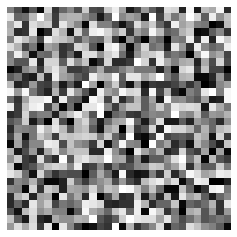

In [6]:
N = 30
snijeg(N)

### 3. MONTY HALL PROBLEM

Kod simulira poznati Monty Hall problem te kao rezultat ispisuje vjerojatnost osvajanja nagrade u slučaju zamjene vrata i u slučaju ostajanja pri početnim vratima.

In [7]:
import numpy as np
from random import *

In [8]:
def promjena_izbora(nagrada):
    vrata = [1,2,3]
    igrac1 = choice(vrata)
    vrata.remove(igrac1)
    monty = choice(vrata)
    while monty == nagrada: monty = choice(vrata)
    vrata.remove(monty)
    igrac2 = vrata[0]
    if igrac2 == nagrada: return True
    else: return False
        
        
def pocetna_vrata(nagrada):
    vrata = [1,2,3]
    igrac1 = choice(vrata)
    if igrac1 == nagrada: return True
    else: return False

In [9]:
N = 10000
nagrada = randint(1,3)
promjena = 0
pocetna = 0

for i in range(N):
    if promjena_izbora(nagrada): promjena += 1
    if pocetna_vrata(nagrada): pocetna += 1

p1 = promjena/N
p2 = pocetna/N
nep1 = np.sqrt(p1*(1-p1)/(N-1))
nep2 = np.sqrt(p2*(1-p2)/(N-1))
print("Ako igrač promjeni izbor, vjerojatnost dobivanja nagrade je: ", p1)
print("statistička nepouzdanost rezultata je: ", nep1)
print("Ako igrač ostane pri početnim vratima, vjerojatnost dobivanja nagrade je: ", p2)
print("statistička nepouzdanost rezultata je: ", nep2)

Ako igrač promjeni izbor, vjerojatnost dobivanja nagrade je:  0.6569
statistička nepouzdanost rezultata je:  0.004747682913728015
Ako igrač ostane pri početnim vratima, vjerojatnost dobivanja nagrade je:  0.3332
statistička nepouzdanost rezultata je:  0.004713809287593207
